<a href="https://colab.research.google.com/github/AlexKressner/KI_Logistik_Python/blob/main/G2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Übersicht
1. [Problem/ Business Understanding](#problem)
1. [Data Understanding & Data Exploration](#data)
  1. [Erster Überblick](#overview)
  1. [Target](#target)
  1. [Features](#feature)
1. [Machine Learning für Regressionsprobleme](#regression)
1. [Machine Learning für Klassifikationsprobleme](#klassifikation)

# Übungsaufgaben
- [Data Exploration - Track & Trace](#tt_eda)
- [Machine Learning - Track & Trace](#tt_ml)
- [Abschlussübung ML](#final)

## 1 Problem/ Business Understanding <a class="anchor" id="problem"></a>
Sie kennen bereits die Daten zu den Fussballweltmeisterschaften von 1930 bis 2014. In diesen ist jedes einzelne Weltmeisterschaftsspiel dokumentiert - von der Zuschauerzahl bis zum Endergebnis. 

Wir werden nun versuchen, die Anzahl der in einem Spiel geschossenen Tore nach Abschluss der ersten Halbzeit vorherzusagen. Durch die Nutzung von maschinellen Lernverfahren versuchen wir aus den zur Halbzeit vorliegenden Daten Muster zu erkennen, die eine zuverlässige Vorhersage der geschossenen Tore erlaubt. 

Zunächst überlegen wir uns, welche Daten (Features) einen Einfluss auf die Anzahl der geschossenen Tore haben. Mit Sicherheit ist in diesem Zusammenhang die Anzahl der zur Halbzeit geschossenen Tore eine wichtige Information. Zusätzlich kann man sich aber auch die folgenden Fragen stellen:
- Hat die Spielpaarung einen Einfluss auf die Anzahl der Tore?
- Hat die Anzahl der Zuschauer einen Einfluss auf die Anzahl der geschossenen Tore?
- Fallen mehr Tore in einem Vorrundenspiel im Vergleich zu einem Halbfinale?
- ...

Sicherlich finden wir auf jede einzelne Frage auch ohne maschinelle Lernverfahren durch eine tiefergehende Datenanalse erste Antworten. Die Bewertung der Einflüsse in ihrer Kombination ist aber schon äußerst schwierig.

Maschinelle Lernverfahren helfen hier enorm. Wir müssen lediglich die Daten in geeigneter Weise aufbereiten, einen passenden Algorithmus auf diese anwenden und erhalten anschließend Prognosen zur interessierten Zielgröße oder Aussagen über die Bedeutung einzelner Features.

**Frage:** Welchem Teilgebiet des maschinellen Lernens ist die oben beschriebene Problemstellung zuzuordnen? Supervised oder Unsupervised Learning?

**Frage:** Handelt es sich um ein Regressions- oder Klassifikationsproblem?

## 2 Data Understanding & Exploration <a class="anchor" id="data"></a>
In einem ersten Schritt ist es wichtig, dass Sie sich einen Überblick zu den vorhandenen Daten verschaffen, d.h.:
- Wie groß ist der Datensatz (Zeilen/Spalten)
- Was bedeuten die einzelnen Werte in den Spalten (Features)?
- Wie sind die Werte der einzelnen Features verteilt?
- Gibt es fehlende Werte, die Sie bereinigen müssen?
- Wie sin die Zusammenhänge zwischen den Features?
- ...

Besonders hilfreich sind an dieser Stelle Visualisierung, die Ihnen einen Überblick zu den Daten geben und bereits etwaige Zusammenhänge zwischen Features und/oder Target aufzeigen!

In [193]:
import pandas as pd # zur Datenanalyse
import matplotlib.pyplot as plt # zur Datenvisualisierug
import numpy as np

In [194]:
# Google-Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
# Daten laden
data = pd.read_csv("/content/drive/MyDrive/WorldCupMatches.txt")

# Die folgende Datenaufbereitung ist für Sie nicht relevant!
data = data.astype({"Datetime": "M", "RoundID": "O", "MatchID": "O"}, errors='raise') 
data.dropna(inplace=True)
data.replace(' ', np.nan, inplace=True)
data["Hour"] = data["Datetime"].dt.hour
data["Weekday"] = data["Datetime"].dt.day_name()
data.Stage.replace(r'Group(.*)', 'Group', regex=True, inplace=True)
data.Stage.replace('First round', 'Group', inplace=True)
data.Stage.replace('Preliminary round', 'Group', inplace=True)
data.Stage.replace(r'.+third.+', 'Third place', regex=True, inplace=True)
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Hour,Weekday
0,1930.0,1930-07-13 15:00:00,Group,Pocitos,Montevideo,France,4.0,1.0,Mexico,NaN,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15,Sunday
1,1930.0,1930-07-13 15:00:00,Group,Parque Central,Montevideo,USA,3.0,0.0,Belgium,NaN,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15,Sunday
2,1930.0,1930-07-14 12:45:00,Group,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,NaN,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,12,Monday
3,1930.0,1930-07-14 14:50:00,Group,Pocitos,Montevideo,Romania,3.0,1.0,Peru,NaN,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,14,Monday
4,1930.0,1930-07-15 16:00:00,Group,Parque Central,Montevideo,Argentina,1.0,0.0,France,NaN,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,16,Tuesday


### 2.1 Erster Überblick zum Datensatz <a class="anchor" id="overview"></a>

In [196]:
# Größe des Datensatzes
data.shape

(850, 22)

In [197]:
# Fehlende Werte
data.isna().any()

Year                    False
Datetime                False
Stage                   False
Stadium                 False
City                    False
Home Team Name          False
Home Team Goals         False
Away Team Goals         False
Away Team Name          False
Win conditions           True
Attendance              False
Half-time Home Goals    False
Half-time Away Goals    False
Referee                 False
Assistant 1             False
Assistant 2             False
RoundID                 False
MatchID                 False
Home Team Initials      False
Away Team Initials      False
Hour                    False
Weekday                 False
dtype: bool

### 2.2 Target <a class="anchor" id="target"></a>
Bei dem Target handelt es sich um die Zielgröße, welche wir prognostizieren wollen. In diesem Fall die Anzahl der geschossenen Tore in der regulären Spielzeit plus etwaiger Verlängerung!

In [198]:
# Berechnung neue Spalte
data["Total Goals"] = data["Home Team Goals"] + data["Away Team Goals"]

[]

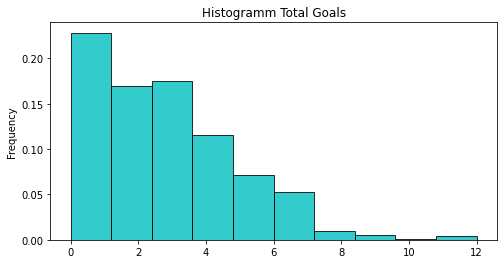

In [199]:
data["Total Goals"].plot(
    kind="hist", 
    title= "Histogramm Total Goals",
    figsize=(8,4),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8
    )
plt.plot()

**Frage:** Warum ist es unabdingbar die folgenden Spalten zu löschen?

In [200]:
data.drop(columns=["Home Team Goals", "Away Team Goals"], inplace=True)

### 2.3 Features <a class="feature" id="overview"></a>
Bei den Features handelt es sich um die Variablen, die zur Vorhersage des Targets verwendet werden - in diesem Fall die Anzahl der geschossenen Tore. 

Zum einen müssen Sie zunächst überlegen, welche der ursprünglichen Features einen Beitrag zur Erklärung des Target leisten können und ob diese noch anzupassen sind. 

Zum anderen leitet man regelmäßig aus den ursprünglichen Features weitere Features ab - in der Annahme, dass diese einen Beitrag zur Vorhersage des Target leisten.

**Relevante Features**

In [201]:
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Attendance,Half-time Home Goals,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Hour,Weekday,Total Goals
0,1930.0,1930-07-13 15:00:00,Group,Pocitos,Montevideo,France,Mexico,NaN,4444.0,3.0,...,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15,Sunday,5.0
1,1930.0,1930-07-13 15:00:00,Group,Parque Central,Montevideo,USA,Belgium,NaN,18346.0,2.0,...,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15,Sunday,3.0
2,1930.0,1930-07-14 12:45:00,Group,Parque Central,Montevideo,Yugoslavia,Brazil,NaN,24059.0,2.0,...,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,12,Monday,3.0
3,1930.0,1930-07-14 14:50:00,Group,Pocitos,Montevideo,Romania,Peru,NaN,2549.0,1.0,...,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,14,Monday,4.0
4,1930.0,1930-07-15 16:00:00,Group,Parque Central,Montevideo,Argentina,France,NaN,23409.0,0.0,...,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,16,Tuesday,1.0


In [202]:
data.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
       'Home Team Initials', 'Away Team Initials', 'Hour', 'Weekday',
       'Total Goals'],
      dtype='object')

In [203]:
irrelevant = ["Year", "City", "Win conditions", 'Referee', 'Stadium',
              'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
              "Home Team Initials", "Away Team Initials", "Datetime"
              ]

In [204]:
# Durch inplace=True müssen Sie nicht schreiben: data = data.drop(...)
data.drop(columns=irrelevant, inplace=True)
data.head()

,Stage,Home Team Name,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Weekday,Total Goals
0,Group,France,Mexico,4444.0,3.0,0.0,15,Sunday,5.0
1,Group,USA,Belgium,18346.0,2.0,0.0,15,Sunday,3.0
2,Group,Yugoslavia,Brazil,24059.0,2.0,0.0,12,Monday,3.0
3,Group,Romania,Peru,2549.0,1.0,0.0,14,Monday,4.0
4,Group,Argentina,France,23409.0,0.0,0.0,16,Tuesday,1.0


**Features zu den zur Halbzeit geschossenen Toren**

In [205]:
data["Half-time Goals"] = data["Half-time Home Goals"] + data["Half-time Away Goals"]
data["Half-time Goals Difference"] = abs(data["Half-time Home Goals"] - data["Half-time Away Goals"])

In [206]:
data["Half-time Goals Difference"].unique()

array([3., 2., 1., 0., 4., 6., 5.])

In [207]:
data["Half-time Goals Difference"].value_counts(normalize=True)

0.0    0.456471
1.0    0.394118
2.0    0.103529
3.0    0.027059
4.0    0.014118
5.0    0.003529
6.0    0.001176
Name: Half-time Goals Difference, dtype: float64

Nach den vorausgegangenen Datenmanipulationen erhalten wir nun den folgenden Dataframe (Target + Features), mit dem wir bei der Anwendung maschineller Lernverfahren weiterarbeiten werden.

In [208]:
data.head()

,Stage,Home Team Name,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Weekday,Total Goals,Half-time Goals,Half-time Goals Difference
0,Group,France,Mexico,4444.0,3.0,0.0,15,Sunday,5.0,3.0,3.0
1,Group,USA,Belgium,18346.0,2.0,0.0,15,Sunday,3.0,2.0,2.0
2,Group,Yugoslavia,Brazil,24059.0,2.0,0.0,12,Monday,3.0,2.0,2.0
3,Group,Romania,Peru,2549.0,1.0,0.0,14,Monday,4.0,1.0,1.0
4,Group,Argentina,France,23409.0,0.0,0.0,16,Tuesday,1.0,0.0,0.0


### 2.4 Korrelationen <a class="feature" id="corr"></a>
Sie erhalten einen ersten sehr guten Eindruck von Zusammenhängen zwischen Features und/ oder Target, wenn Sie Korrelationskoeffizienten berechnen. Mithilfe von `pandas` gelingt dies mühelos.


In [209]:
correlation_matrix = data.corr()

**Korrelationskoeffizient**

Mit der `pandas`-Funktion `.corr()` berechnen Sie den [Korrelationskoeffizienten nach Pearson](https://de.wikipedia.org/wiki/Korrelationskoeffizient). Dieser misst den "linearen" Zusammenhang zwischen zwei stetigen Merkmalen. Der Koeffizient reicht von 1 bis -1. Für den Fall, dass er nahe 1 liegt, bedeutet dies, dass eine starke positive Korrelation besteht, d.h. "wenn Werte des Merkmals `x` steigen, steigen auch solche des Merkmals `y`"! Der umgekehrte Fall gilt für Koeffizienten, die nahe -1 liegen. Bitte behalten Sie in Erinnerung, dass der Korrelationskoeffizient nach Pearson nur lineare Zusammenhänge erfasst. Regelmäßig finden Sie aber auch nicht-lineare Korrelationen, die dann nicht erfasst werden ([Beispiel](https://de.wikipedia.org/wiki/Korrelationskoeffizient#/media/Datei:Correlation_examples.png)).

In [210]:
correlation_matrix["Total Goals"].sort_values(ascending=False)

Total Goals                   1.000000
Half-time Goals               0.699043
Half-time Home Goals          0.598146
Half-time Goals Difference    0.510889
Half-time Away Goals          0.378531
Hour                          0.004866
Attendance                   -0.113603
Name: Total Goals, dtype: float64

**Kreuztabellen und Heatmaps**

In [211]:
data.groupby("Weekday")["Total Goals"].mean().sort_values(ascending=False)

Weekday
Sunday       3.421053
Wednesday    2.836879
Tuesday      2.776786
Saturday     2.724138
Thursday     2.640777
Monday       2.493151
Friday       2.302326
Name: Total Goals, dtype: float64

In [212]:
pd.crosstab(index=data["Weekday"], columns=data["Total Goals"])

Total Goals,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Weekday,,,,,,,,,,,,,
Friday,10,24,15,19,9,4,4,1,0,0,0,0,0
Monday,7,10,23,15,12,4,1,1,0,0,0,0,0
Saturday,16,29,26,33,18,13,3,2,2,2,0,0,1
Sunday,7,37,26,34,34,23,11,10,5,0,1,2,0
Thursday,10,20,24,22,11,9,3,2,1,1,0,0,0
Tuesday,10,17,29,29,11,6,3,3,2,1,0,1,0
Wednesday,12,24,30,27,23,14,6,4,0,1,0,0,0


Das Package `seaborn` ist eine Erweiterung der Standardfunktionalitäten von `matplotlib`, welches wir bisher verwendet haben. Mit `seaborn` lassen sich optisch sehr ansprechende Visualisierung auf recht einfache Art und Weise erstellen. Immer wieder gerne genutzt wird die Visualisierungsform einer **Heatmap**, die sehr intuituve den Zusammenhang zwischen Variablen wiedergibt. Detaillierte Hinweise zur Erstellung von Heatmaps finden Sie [hier](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [213]:
import seaborn as sns

In [214]:
# über normalize=True werden Prozentwerte berechnet, z.B. bei wie viel Prozent der Spiele an einem 
# Sonntag sind 4 Tore gefallen!
crosstab = pd.crosstab(index=data["Weekday"], columns=data["Total Goals"], normalize=True)

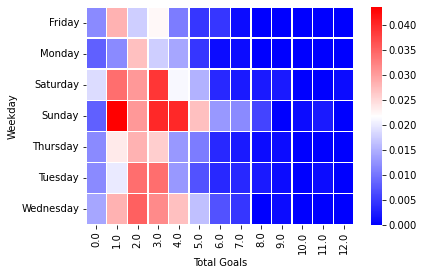

In [215]:
ax = sns.heatmap(crosstab, linewidths=.5, cmap="bwr")

Über das Argument `cmap` steuern Sie die farbliche Darstellung der Heatmap. Sämtliche Farbpaletten finden Sie [hier](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### Übung Datenexploration mit Track & Trace Daten <a class="anchor" id="tt_eda"></a>
**Einführung**

Ein Automobilhersteller hat weltweit verteilte Produktionsstandorte, u.a. auch ein Werk in den USA. Dieses Werk wird mit diversen Bauteilen zur Herstellung von Fahrzeugen aus Europa beliefert. 

Zur Erhöhung der Transparenz in der Supply Chain wurde vor kurzer Zeit Track und Trace System aufgebaut, welches Daten für einzelne Sendungen an definierten Standorten in der Lieferkette aufnimmt. Die Daten finden Sie nachfolgend:

In [216]:
df = pd.read_csv("/content/drive/MyDrive/KI_LOG_mit_PYTHON/track_trace.txt")
df.head(10)

,ContainerNumber,ShipmentNumber,EventName,EventTime,EventLocation,VesselName,Time2Arrival,EventCombined,EventTimeMonth,EventTimeDay
0,HLXU8170197,4868820,Loading Ship,2018-07-04 13:58:00,Hafen Rotterdam,NYK ROMULUS,125,"Loading Ship, Hafen Rotterdam",July,Wednesday
1,HLXU8170197,4868820,Departure Ship,2018-07-04 19:05:00,Hafen Rotterdam,NYK ROMULUS,125,"Departure Ship, Hafen Rotterdam",July,Wednesday
2,HLXU8170197,4868820,Unloading Ship,2018-04-21 06:19:00,Hafen Charleston,NYK ROMULUS,111,"Unloading Ship, Hafen Charleston",April,Saturday
3,HLXU8170197,4868820,Departure Truck,2018-04-21 11:42:00,Hafen Charleston,NYK ROMULUS,111,"Departure Truck, Hafen Charleston",April,Saturday
4,HLXU8170197,4868820,Arrival Truck,2018-08-05 18:12:00,Hafen Charleston,NYK ROMULUS,94,"Arrival Truck, Hafen Charleston",August,Sunday
5,HLXU8170197,4868820,Loading Truck,2018-07-16 14:15:00,Consolidation Center Speyer,NYK ROMULUS,25,"Loading Truck, Consolidation Center Speyer",July,Monday
6,HLXU8170197,4868820,Arrival Truck,2018-07-24 02:03:00,Hafen Antwerpen,NYK ROMULUS,17,"Arrival Truck, Hafen Antwerpen",July,Tuesday
7,HLXU8170197,4868820,Arrival Ship,2018-02-08 21:54:00,Bahnterminal Savannah,NYK ROMULUS,7,"Arrival Ship, Bahnterminal Savannah",February,Thursday
8,HLXU8170197,4868820,Registration Yard,2018-10-08 16:18:00,Werk Tuscaloosa,NYK ROMULUS,0,"Registration Yard, Werk Tuscaloosa",October,Monday
9,HLXU8170197,4868820,Goods Receipt Dock,2018-10-08 20:50:00,Werk Tuscaloosa,NYK ROMULUS,0,"Goods Receipt Dock, Werk Tuscaloosa",October,Monday


In [217]:
df["EventName"].unique()

array(['Loading Ship', 'Departure Ship', 'Unloading Ship',
       'Departure Truck', 'Arrival Truck', 'Loading Truck',
       'Arrival Ship', 'Registration Yard', 'Goods Receipt Dock',
       'New Scheduling', 'Container Closed'], dtype=object)

Jeder einzelne Container (`ContainerNumber`) ist einer Sendung zugeordnet, wobei jede Sendung eine eindeutige Kennzeichnung (`Shipment Number`) aufweist. Zu jeder Sendung werden definierte Events aufgenommen. Diese beinhalten den Namen des Events (`EventName`), die Zeit des Events (`EventTim`) sowie die Lokation des Events (`EventLocation`). Weiterhin ist jeder Sendung ein Schiff (`VesselName`) zugeordnet. In der letzten Spalten finden Sie die Ankunftszeit in **Tagen** (`Time2Arrival`). Diese stellt die Zeit zwischen dem jeweiligen Event und dem Zielevent dar. Der Zielevent ist die Vereinnahmung der Ware (`EventName = Goods Receipt Dock`) im Werk in den USA. Der Datensatz wird um weitere abgeleitete Informationen ergänzt (`EventNameCombined`, `EventTimeMonth`, `EventTimeDay`).


**Aufgabenstellung**

Die Supply Chain Abteilung des Automobilherstellers verfolgt das Ziel, die Daten aus dem Track und Trace System für die Steuerung von Transporten und Beständen zu nutzen. Da es sich um ein neues Projekt zur intelligenten Datenanalyse handelt, wurden Sie gebeten in einem ersten Schritt die zur Verfügung gestellten Daten in Form einer explorativen Datenanalyse aufzubereiten und zu analysieren.

**Konkrete Fragestellungen/ Aufgaben**


1. Wie viele Events finden sich in dem vorliegenden Datensatz?
1. Von welchen deutschen Häfen wird das Werk in Tuscaloosa beliefert? Filtern Sie dazu zunächst auf das Event mit dem Namen `Loading Ship`. Anschließend betrachten Sie die Werte in der Spalte `EventLocation`.
1. Wie ist die mittlere Transportzeit (`Time2Arrival`) von jedem dieser deutschen Häfen zum Werk in den USA? Filtern Sie dazu die `EventLocation` zunächst auf die deutschen Häfen (am besten mithilfe von `isin()`) und speichern Sie die Daten in einer neuen Variablen. Anschließend müssen Sie die Daten nach Häfen gruppieren (`groupby()`) und den Mittelwert der `Time2Arrival` bilden (`mean()`).
1. Erstellen Sie anschließend jeweils ein Histogramm zur `Time2Arrival` für jeden deutschen Hafen. Welcher Hafen hat aus Ihrer Sicht eine bessere Performance?

In [218]:
# Aufgabe 1
f"Insgesamt gibt es im Datensatz {df.shape[0]} Events!"

'Insgesamt gibt es im Datensatz 18632 Events!'

In [219]:
# Aufgabe 2

# Variante 1
df[df["EventName"]=="Loading Ship"]["EventLocation"].unique()

# Variante 2
pd.unique(df["EventLocation"][(df["EventName"]=="Loading Ship")])

array(['Hafen Rotterdam', 'Hafen Bremerhaven', 'Hafen Antwerpen',
       'Hafen Hamburg'], dtype=object)

In [220]:
# Aufgabe 3
# 1.Schritt: Filterung der Daten
hafen_de = df[df["EventLocation"].isin(["Hafen Bremerhaven", "Hafen Hamburg"])]
hafen_de = hafen_de[hafen_de["EventName"]=="Loading Ship"]
hafen_de.head()

# 2.Schritt: Gruppieren nach Hafen und mittlere Time2Arrival berechen
hafen_de.groupby("EventLocation")["Time2Arrival"].mean()

EventLocation
Hafen Bremerhaven    41.558273
Hafen Hamburg        28.616279
Name: Time2Arrival, dtype: float64

[]

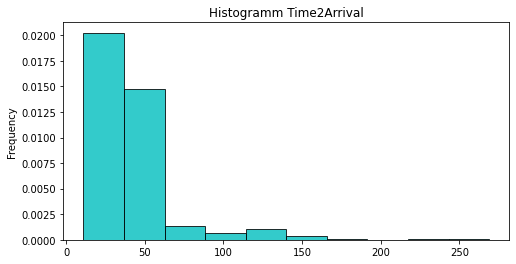

In [221]:
# Aufgabe 4
# Grafik für Hafen Bremerhaven
hafen_de[hafen_de["EventLocation"]=="Hafen Bremerhaven"]["Time2Arrival"].plot(
    kind="hist", 
    title= "Histogramm Time2Arrival",
    figsize=(8,4),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8
    )
plt.plot()

[]

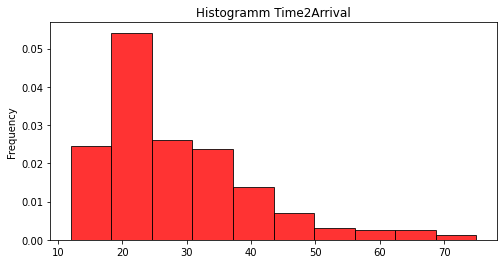

In [222]:
# Aufgabe 4
# Grafik für Hafen Hamburg
hafen_de[hafen_de["EventLocation"]=="Hafen Hamburg"]["Time2Arrival"].plot(
    kind="hist", 
    title= "Histogramm Time2Arrival",
    figsize=(8,4),
    color="r",
    edgecolor='k',
    density=True,
    alpha=0.8
    )
plt.plot()

## 3 Machine Learning für Regressionprobleme <a class="anchor" id="regression"></a>
Wir betrachten nun wieder den Fifa World Cup Datensatz und werden nun wie eingangs beschrieben ein ML-Verfahren verwenden, um die Anzahl der am Ende der regulären Spielzeit (ggf. plus Verlängerung) geschossenen Tore vorherzusagen. Wir nutzen zu diesem Zweck alle Informationen, die uns zur Halbzeit eines Spiels vorliegen.

### 3.1 Datensatz in Features und Target teilen
Zunächst einmal müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [223]:
# Features, d.h. womit lässt sich die Anzahl der Tore prognostizeren!
X = data.drop(columns="Total Goals")
X.head()

,Stage,Home Team Name,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Weekday,Half-time Goals,Half-time Goals Difference
0,Group,France,Mexico,4444.0,3.0,0.0,15,Sunday,3.0,3.0
1,Group,USA,Belgium,18346.0,2.0,0.0,15,Sunday,2.0,2.0
2,Group,Yugoslavia,Brazil,24059.0,2.0,0.0,12,Monday,2.0,2.0
3,Group,Romania,Peru,2549.0,1.0,0.0,14,Monday,1.0,1.0
4,Group,Argentina,France,23409.0,0.0,0.0,16,Tuesday,0.0,0.0


In [224]:
# Target, d.h. was soll prognostiziert werden!
y = data["Total Goals"]
y.head()

0    5.0
1    3.0
2    3.0
3    4.0
4    1.0
Name: Total Goals, dtype: float64

In [225]:
X.shape, y.shape

((850, 10), (850,))

### 3.2 Datensatz in Trainings- und Testmenge aufteilen

Bevor wir gleich zu der Aufteilung in Trainings- & Testdaten zum Training des ML-Verfahrens kommen, müssen die nicht-numerischen Daten passend aufbereitet werden. Das Vorgehen ist dabei immer gleich. Zur Illustration nutzen wir die Fifa World Cup Daten und dabei die ersten 5 Eintragungen in der Spalte `Home Team Name`.

In [226]:
example = data["Home Team Name"].head()
example

0        France
1           USA
2    Yugoslavia
3       Romania
4     Argentina
Name: Home Team Name, dtype: object

Wie Ihnen bekannt, enthält die Spalte die jeweilige Heimmannschaft eines Spiels. Wenn wir mit dem Package `sklearn` und den darin verfügbaren ML-Algorithmen arbeiten, müssen wir die Datenstrutkur umwandeln. Dazu nutzen wir die Funktion `get_dummies` wie in der unteren Codezeile dargestellt.

In [227]:
pd.get_dummies(example)

,Argentina,France,Romania,USA,Yugoslavia
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0


Wir können die Funktion `get_dummies` auf den gesamten Datensatz anwenden und Pandas sucht sich selbst die umzuwandelnden Spalten.



In [228]:
X = pd.get_dummies(X)
X.head()

,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Half-time Goals,Half-time Goals Difference,Stage_Final,Stage_Group,Stage_Quarter-finals,Stage_Round of 16,...,"Away Team Name_rn"">Serbia and Montenegro","Away Team Name_rn"">Trinidad and Tobago","Away Team Name_rn"">United Arab Emirates",Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,4444.0,3.0,0.0,15,3.0,3.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,18346.0,2.0,0.0,15,2.0,2.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,24059.0,2.0,0.0,12,2.0,2.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2549.0,1.0,0.0,14,1.0,1.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,23409.0,0.0,0.0,16,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Bei der Aufteilung der Daten in Test- und Trainingsmenge hilft die Funktion `train_test_split`.

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
# Training Algorithmus: X_train (Features), y_train (Target)
# Test des Algorithmus (Bewertung): X_test, y_test
#     1) Algorithmus bekommt Daten (X_test), die er noch nicht kennt & macht Prognose
#     2) Vergleich Prognose mit tatsächlichen Werte (y_test) --> Bewertung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Trainingsdaten:** Das jeweilige ML-Verfahren kennt `y_train` (Target, d.h. Anzahl geschossener Tore) und `X_train` (Features, d.h. die zugehörigen Merkmale des jeweiligen Spiels wie Tore zur Halbzeit etc., die das Target erklären) und versucht einen Zusammenhang zwischen diesen zu lernen!

In [231]:
y_train.head()

523    5.0
112    5.0
661    3.0
132    4.0
95     2.0
Name: Total Goals, dtype: float64

In [232]:
X_train.head()

,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Half-time Goals,Half-time Goals Difference,Stage_Final,Stage_Group,Stage_Quarter-finals,Stage_Round of 16,...,"Away Team Name_rn"">Serbia and Montenegro","Away Team Name_rn"">Trinidad and Tobago","Away Team Name_rn"">United Arab Emirates",Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
523,35500.0,1.0,1.0,14,2.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
112,12217.0,1.0,1.0,19,2.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
661,50000.0,1.0,0.0,15,1.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
132,49471.0,1.0,1.0,19,2.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95,17000.0,1.0,0.0,17,1.0,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


### 3.3 Modell auswählen

Für Regressions- und Klassifikationsprobleme gibt es eine Unmenge an ML-Verfahren. Eine Übersicht finden Sie [hier](https://scikit-learn.org/stable/). Wir werden das Verfahren `Random Forest` verwenden. Es gehört zu den besten und robustestens Verfahren im Bereich Machine Learning und wird aus diesem Grund häufig in der Praxis eingesetzt.

In [233]:
from sklearn.ensemble import RandomForestRegressor

In [234]:
model = RandomForestRegressor()

### 3.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. In der Grundeinstellung wird die Summe der quadrierten Fehler minimiert, d.h. $∑(y_i - \hat{y}_i)^2$ mit $y=$Anzahl geschossene Tore Spiel $i$ und $\hat{y}=$Prognose Anzahl geschossene Tore Spiel $i$.

In [235]:
model.fit(X_train, y_train)

RandomForestRegressor()

### 3.5 Modell anwenden

Zu diesem Zweck nutzen wir nun die **Testdaten**. Das ML-Verfahren erhält die Daten `X_test`, d.h. die Merkmale eines Spiels und wendet die gelernten Zusammenhänge zur Prognose des Targets an, d.h. die Anzahl der geschossenen Tore!

In [236]:
X_test.head()

,Attendance,Half-time Home Goals,Half-time Away Goals,Hour,Half-time Goals,Half-time Goals Difference,Stage_Final,Stage_Group,Stage_Quarter-finals,Stage_Round of 16,...,"Away Team Name_rn"">Serbia and Montenegro","Away Team Name_rn"">Trinidad and Tobago","Away Team Name_rn"">United Arab Emirates",Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
108,10647.0,1.0,0.0,19,1.0,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
458,73347.0,1.0,0.0,17,1.0,1.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
201,20654.0,1.0,0.0,16,1.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
146,9794.0,2.0,0.0,15,2.0,2.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
562,77000.0,0.0,1.0,21,1.0,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [237]:
y_pred = model.predict(X_test)
y_pred

array([2.53, 2.56, 1.96, 4.4 , 1.72, 3.12, 3.88, 5.49, 2.35, 3.79, 1.73,
       3.25, 3.96, 4.67, 5.36, 1.28, 3.74, 1.  , 3.22, 2.57, 1.81, 1.3 ,
       1.62, 1.23, 2.72, 2.36, 2.57, 1.24, 0.51, 2.5 , 6.83, 1.65, 2.52,
       2.62, 1.6 , 5.63, 1.24, 2.14, 3.75, 2.32, 1.21, 0.81, 5.52, 1.5 ,
       1.18, 1.51, 6.32, 4.73, 5.73, 2.05, 1.29, 2.1 , 2.5 , 3.69, 2.94,
       3.09, 2.12, 2.24, 2.47, 3.2 , 5.84, 2.49, 1.15, 1.64, 2.39, 1.73,
       1.48, 1.01, 2.1 , 5.77, 3.82, 1.98, 6.62, 1.94, 2.78, 5.51, 1.9 ,
       1.64, 1.11, 1.22, 3.43, 0.79, 2.4 , 1.64, 7.56, 2.93, 2.7 , 3.76,
       2.94, 0.86, 3.6 , 1.88, 3.9 , 5.92, 5.45, 1.43, 1.91, 2.48, 1.27,
       4.  , 4.54, 3.28, 1.65, 3.79, 2.31, 1.54, 3.58, 1.91, 4.17, 3.96,
       1.12, 4.88, 5.26, 1.37, 3.3 , 2.45, 1.85, 2.14, 3.32, 1.18, 5.74,
       2.55, 4.46, 6.73, 0.98, 1.21, 4.73, 2.23, 2.02, 3.2 , 2.32, 1.02,
       5.83, 5.21, 2.01, 3.52, 1.64, 2.94, 3.01, 5.13, 7.34, 2.  , 7.5 ,
       1.17, 3.11, 0.96, 1.96, 0.99, 1.99, 1.13, 2.

### 3.6 Modell evaluieren

Nachdem nun Prognosewerte durch das angelernte Verfahren berechnet wurden, können wir diese mit den tatsächlichen Werten des Target, also der tatsächlichen Anzahl der geschossenen Tore vergleichen (`y_test`). Daraus können wir dann die Güte eines Verfahrens ableiten!

In [238]:
import sklearn.metrics

In [239]:
# Genauigkeit des Modells auf der Testmenge 
sklearn.metrics.mean_absolute_error(y_test, y_pred)

1.1984117647058825

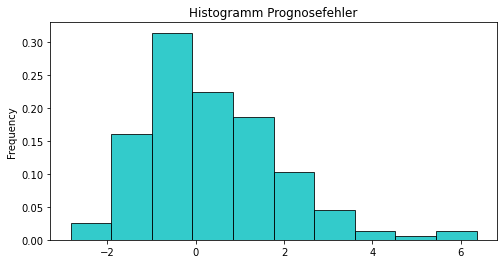

In [240]:
(y_test - y_pred).plot(
    kind="hist",
    title= "Histogramm Prognosefehler",
    figsize=(8,4),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8    
    )
plt.show()

### Übung Machine Learning Modell mit Track & Trace Daten <a class="anchor" id="tt_ml"></a>

Sie haben nun erfolgreich eine erste Analyse der Track & Trace Daten gemacht. Sie sollen nun versuchen, die Transportzeit von den europäischen Häfen zum Werk in den USA mithilfe von ML-Verfahren zu prognostizieren. Sollte dies gut gelingen, ist das die Grundlage um die Versorgungssicherheit zu erhöhen und Bestände im Werk zu reduzieren.

Nachfolgend finden Sie die relevanten Daten mit entsprechender Filterung. Gehen Sie nun die Schritte `1-6` aus dem Kapitel "Training eines ML-Verfahrens" durch und wenden Sie es analog auf die Track & Trace Daten an.

In [241]:
df = df[df["EventName"]=="Loading Ship"]
df.head()

,ContainerNumber,ShipmentNumber,EventName,EventTime,EventLocation,VesselName,Time2Arrival,EventCombined,EventTimeMonth,EventTimeDay
0,HLXU8170197,4868820,Loading Ship,2018-07-04 13:58:00,Hafen Rotterdam,NYK ROMULUS,125,"Loading Ship, Hafen Rotterdam",July,Wednesday
10,TCNU9520816,4875096,Loading Ship,2018-07-04 07:40:00,Hafen Bremerhaven,CHARLESTON EXPRESS,129,"Loading Ship, Hafen Bremerhaven",July,Wednesday
20,FCIU7037104,4875783,Loading Ship,2018-07-04 07:36:00,Hafen Bremerhaven,CHARLESTON EXPRESS,66,"Loading Ship, Hafen Bremerhaven",July,Wednesday
26,TCKU9338469,4876281,Loading Ship,2018-07-04 07:46:00,Hafen Bremerhaven,CHARLESTON EXPRESS,53,"Loading Ship, Hafen Bremerhaven",July,Wednesday
33,UACU5380472,4878162,Loading Ship,2018-09-04 21:20:00,Hafen Bremerhaven,YORKTOWN EXPRESS,53,"Loading Ship, Hafen Bremerhaven",September,Tuesday


In [242]:
irrelevant = ["ContainerNumber","ShipmentNumber", "EventTime", "EventCombined"]
df.drop(columns=irrelevant, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [243]:
df.head()

,EventName,EventLocation,VesselName,Time2Arrival,EventTimeMonth,EventTimeDay
0,Loading Ship,Hafen Rotterdam,NYK ROMULUS,125,July,Wednesday
10,Loading Ship,Hafen Bremerhaven,CHARLESTON EXPRESS,129,July,Wednesday
20,Loading Ship,Hafen Bremerhaven,CHARLESTON EXPRESS,66,July,Wednesday
26,Loading Ship,Hafen Bremerhaven,CHARLESTON EXPRESS,53,July,Wednesday
33,Loading Ship,Hafen Bremerhaven,YORKTOWN EXPRESS,53,September,Tuesday


**1) Daten in Features und Target aufteilen**

**2) Datensatz in Trainings- und Testmenge aufteilen**

**3) Modell auswählen**

**4) Modell trainieren**

**5) Modell anwenden**

**6) Modell evaluieren**

**7) Vorhersage machen**

**Frage:** Welche weiteren Features könnten helfen, um die Prognose der Ankunftszeit zu verbessern?

## 4 Machine Learning für Klassifikationsprobleme <a class="anchor" id="klassifikation"></a>
Im nachfolgenden Beispiel werden wir ein ML-Verfahren einsetzen, um anhand von Untersuchungsergebnissen vorherzusagen, ob ein Patient Diabetes hat. Es handelt sich dabei um eine Klassifikationsproblem (Diabetes/ keine Diabetes). Wir verwenden einen Datensatz mit folgenden Informationen:
1. Anzahl Schwangerschaften
1. Glukosekonzentration nach Glukosetoleranztest
1. Blutdruck (mm Hg)
1. Dicke der Trizepshautfalte (mm)
1. Insulinwert (mu U/ml)
1. Body mass index 
1. Diabetesvorbelastungsfunktion
1. Alter (Jahre)
1. Diabetes (0/1)

Die relevanten Daten haben die folgende Form:

In [244]:
data = pd.read_csv("/content/drive/MyDrive/KI_LOG_mit_PYTHON/diabetes_clean.txt")
data.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4.1 Datensatz in Features und Target teilen

Wie bereits zuvor müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [245]:
# Features, d.h. womit lässt sich Diabetes prognostizeren!
X = data.drop(columns="diabetes")
X.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [246]:
# Target, d.h. was soll prognostiziert werden!
y = data["diabetes"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

### 4.2 Datensatz in Trainings- und Testmenge aufteilen
Erneut müssen wir die Daten aufteilen. Da wir ausschließlich mit numerischen Daten arbeiten, müssen wir keine Datenaufbereitung über `pd.get_dummies` vornehmen.

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
# X und y werden in Trainings- und Testmenge aufgeteilt, so dass die Testmenge 20% der vorhandenen Daten hat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [249]:
y_train.head()

468    1
478    0
107    0
304    0
515    1
Name: diabetes, dtype: int64

In [250]:
X_train.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
468,8,120,0,0,0,30.0,0.183,38
478,8,126,74,38,75,25.9,0.162,39
107,4,144,58,28,140,29.5,0.287,37
304,3,150,76,0,0,21.0,0.207,37
515,3,163,70,18,105,31.6,0.268,28


### 4.3 Modell auswählen

Erneut verwenden wir das Verfahren `Random Forest`. Sie müssen allerdings darauf achten, dass Sie einen Random Forest zur Klassifikation importieren. Aus diesem Grund verwenden wir das Verfahren `RandomForestClassifier`. Für die Regressionaufgabe hatten wir das Verfahren `RandomForestRegressor` genutzt. Achten Sie auf diesen wichtigen Unterschied!

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
model = RandomForestClassifier()

### 4.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. Letzteres misst den Grad der Fehlklassifikation. Beispiel für Fehlklassifikation: Das Modell prognostiziert Diabetes für einen Patienten, in der Realität liegt die Erkrankung aber nicht vor.

In [253]:
model.fit(X_train, y_train)

RandomForestClassifier()

### 4.5 Modell anwenden

Das ML-Verfahren erhält die Daten `X_test`, d.h. die Untersuchungsergebnisse mit den relevanten Merkmalen und wendet die gelernten Zusammenhänge zur Prognose des Targets an, d.h. dem Vorhandensein von Diabetes (0/1)!

In [254]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

### 4.6 Modell evaluieren

Die Modellbewertung erfolgt bei der Klassifikation regelmäßg nach dem Kriterium der "Accuracy" (andere kommen aber auch zum Einsatz). Die Accuracy setzt die Anzahl der korrekten Klassifikation in das Verhältnis zur Anzahl aller Beobachtungen. Dementsprechend stellt sie den Anteil der korrekten Klassifikationen dar.

In [255]:
sklearn.metrics.accuracy_score(y_test, y_pred) * 100

75.32467532467533

Zur Veranschaulichung von Klassifikationsergebnissen hilft regelmäßig eine Konfusionsmatrix. Diese wird wie folgt erstellt:

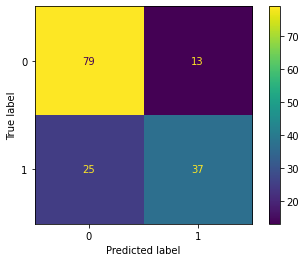

In [256]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

### 4.7 Beispiel Vorhersage der Anzahl von Schwangerschaften

In [266]:
# Modelltraining
X = data.drop(columns="schwangerschaften")
y = data["schwangerschaften"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
# Modellanwendung Person1
person = data.head(1).drop(columns="schwangerschaften").copy()
person

,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter,diabetes
0,148,72,35,0,33.6,0.627,50,1


In [288]:
model.predict(person)

array([6])

In [299]:
# Modellanwendung Person2
person["bmi"]=20
person["diabetes"]=0
person["alter"]=25

In [298]:
model.predict(person)

array([3])

### Abschlussübung Machine Learning <a class="anchor" id="final"></a>
Wir bleiben beim Datensatz zur Diabetes. Entwickeln Sie ein Machine Learning Modell, welches den BMI einer untersuchten Person auf Basis der Untersuchungsergebnisse (inkl. Diabetesbefund) vorhersagt!